<a href="https://colab.research.google.com/github/gustavoramos82/Classificando-Fake-News-/blob/main/Modelagem/Fazendo_baseline_xom_algoritmos_de_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem com algoritmos de machine learning

Neste notebook será aplicado modelos de machine learning para servir de baseline e comparar com os modelos de redes neurais para ver qual seria melhor aplicar de acordo com as métricas

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

from xgboost import XGBClassifier

In [16]:
def metricas(y_teste,y_pred):
  print(confusion_matrix(y_teste,y_pred))
  print('--'*5)
  print('Acc:',accuracy_score(y_teste,y_pred))
  print('Pre:',precision_score(y_teste,y_pred))
  print('Rec:',recall_score(y_teste,y_pred))
  print('F1:',f1_score(y_teste,y_pred))

In [2]:
news = pd.read_csv('/content/drive/MyDrive/Datasets/Fake news deep/Ouro/News.csv')
news.drop('Unnamed: 0',axis=1,inplace=True)
news.dropna(inplace=True)
news['label'] = news['label'].astype(int)
news.head()

,title,label
0,us budget fight loom republican flip fiscal sc...,0
1,us militari accept transgend recruit monday pe...,0
2,senior us republican senat let mr mueller job,0
3,fbi russia probe help australian diplomat tipo...,0
4,trump want postal servic charg much amazon shi...,0


<Axes: xlabel='label', ylabel='count'>

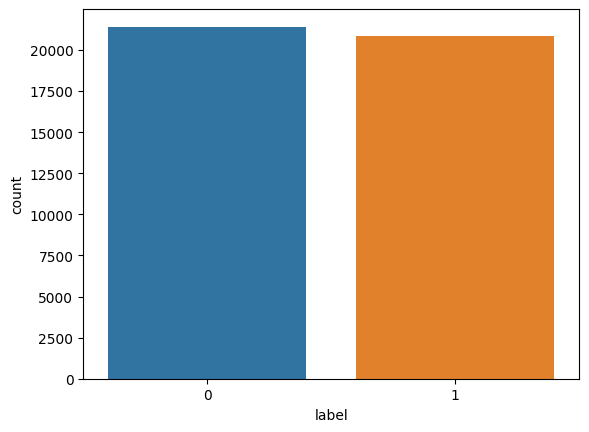

In [11]:
sns.countplot(x='label',data=news)

In [3]:
tdif = TfidfVectorizer()

x = tdif.fit_transform(news.title)

In [4]:
y = news.label

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2,random_state=42)

Regressão Logistica

In [6]:
reg_log = LogisticRegression()
reg_log.fit(x_treino,y_treino)
log_pred = reg_log.predict(x_teste)

In [17]:
metricas(y_teste,log_pred)

[[4090  246]
 [ 293 3831]]
----------
Acc: 0.9362884160756502
Pre: 0.9396615158204562
Rec: 0.9289524733268671
F1: 0.9342763077673454


Naive Bayes

In [19]:
mb = MultinomialNB()
mb.fit(x_treino,y_treino)
mb_pred = mb.predict(x_teste)

In [20]:
metricas(y_teste,mb_pred)

[[4039  297]
 [ 276 3848]]
----------
Acc: 0.9322695035460993
Pre: 0.9283474065138722
Rec: 0.933074684772066
F1: 0.9307050429314306


Árvore de decisão

In [26]:
tree = DecisionTreeClassifier()
tree.fit(x_treino,y_treino)
tree_pred = tree.predict(x_teste)


In [27]:
metricas(y_teste,tree_pred)

[[3870  466]
 [ 399 3725]]
----------
Acc: 0.8977541371158393
Pre: 0.8888093533762825
Rec: 0.9032492725509215
F1: 0.8959711365003007


Random Forest

In [31]:
random = RandomForestClassifier()
random.fit(x_treino,y_treino)
random_pred = random.predict(x_teste)

In [32]:
metricas(y_teste,random_pred)

[[4092  244]
 [ 280 3844]]
----------
Acc: 0.9380614657210402
Pre: 0.9403131115459883
Rec: 0.9321047526673133
F1: 0.9361909400876767


Xgboost

In [33]:
xgb = XGBClassifier()
xgb.fit(x_treino,y_treino)
xgb_pred = xgb.predict(x_teste)

In [34]:
metricas(y_teste,xgb_pred)

[[4085  251]
 [ 563 3561]]
----------
Acc: 0.9037825059101655
Pre: 0.9341552990556139
Rec: 0.8634820562560621
F1: 0.897429435483871


Extra tree

In [35]:
extra = ExtraTreesClassifier()
extra.fit(x_treino,y_treino)
extra_pred = extra.predict(x_teste)

In [36]:
metricas(y_teste,extra_pred)

[[4118  218]
 [ 271 3853]]
----------
Acc: 0.9421985815602837
Pre: 0.9464505035617784
Rec: 0.9342870999030067
F1: 0.9403294691885296


Gradiente Boosting

In [38]:
grad = GradientBoostingClassifier()
grad.fit(x_treino,y_treino)
grad_pred = grad.predict(x_teste)

In [39]:
metricas(y_teste,grad_pred)

[[4033  303]
 [1072 3052]]
----------
Acc: 0.8374704491725768
Pre: 0.9096870342771982
Rec: 0.7400581959262852
F1: 0.8161518919641663


Podemos ver que os modelos q tiveram a melhor perfomace, foram extra tree, random forest e regressão logistica

Text(911.6045751633989, 0.5, 'Valor Predito')

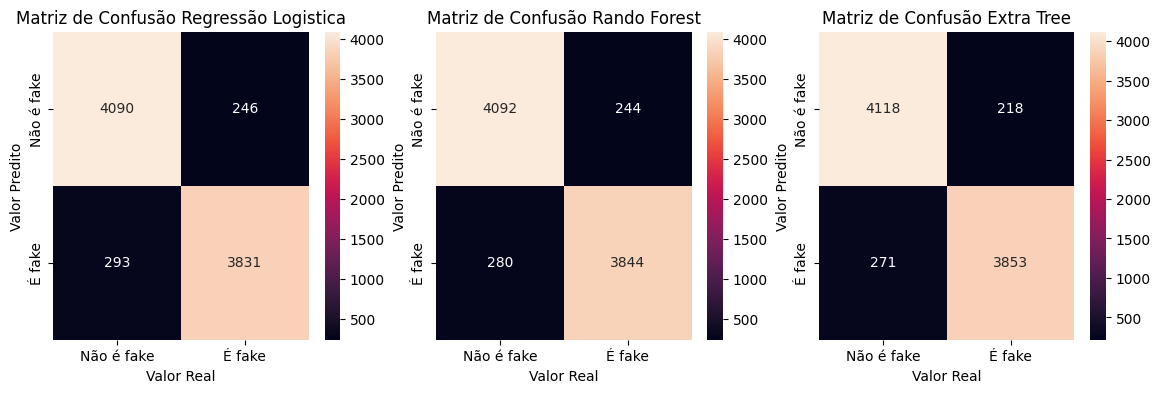

In [66]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)

plt.title('Matriz de Confusão Regressão Logistica')
sns.heatmap(confusion_matrix(y_teste,log_pred),annot=True,fmt=".0f")
ticks, labels = plt.yticks()
plt.yticks(ticks, ['Não é fake','É fake'])
plt.xticks(ticks, ['Não é fake','É fake'])
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

plt.subplot(1,3,2)

plt.title('Matriz de Confusão Rando Forest')
sns.heatmap(confusion_matrix(y_teste,random_pred),annot=True,fmt=".0f")
ticks, labels = plt.yticks()
plt.yticks(ticks, ['Não é fake','É fake'])
plt.xticks(ticks, ['Não é fake','É fake'])
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

plt.subplot(1,3,3)

plt.title('Matriz de Confusão Extra Tree')
sns.heatmap(confusion_matrix(y_teste,extra_pred),annot=True,fmt=".0f")
ticks, labels = plt.yticks()
plt.yticks(ticks, ['Não é fake','É fake'])
plt.xticks(ticks, ['Não é fake','É fake'])
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')